<a href="https://colab.research.google.com/github/johnmot/DataAnalysisProjects/blob/main/%EC%97%90%ED%8B%B0%EC%98%A4%ED%94%BC%EC%95%84%EC%9E%91%EB%AC%BC%EA%B7%BC%EC%A0%81%EC%99%B8%EC%84%A0(%EC%A0%84%EC%B2%98%EB%A6%AC%EC%97%B0%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
myfile = files.upload()
#https://nirpyresearch.com/exporting-nir-regression-models-built-in-python/

Saving Chickpea.data.csv to Chickpea.data.csv


In [1]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(myfile['Chickpea.data.csv']))
df.head()

NameError: ignored

In [ ]:
df.shape

(1200, 332)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline
x_data = df.iloc[:,1:].dropna()#fillna('nani')
y_data=pd.DataFrame(df['Predictor']).dropna() #fillna('nani')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_data = y_data.apply(le.fit_transform)
y_data

,Predictor
0,7
1,7
2,7
3,7
4,7
...,...
945,0
946,0
947,0
948,0


In [ ]:
y_data.value_counts()

Predictor
17           52
18           50
8            50
1            50
2            50
3            50
4            50
5            50
6            50
7            50
9            50
10           50
11           50
12           50
13           50
15           50
16           50
0            50
14           48
dtype: int64

In [ ]:
df.Predictor.value_counts()

Teketawi      52
Mariye        50
Dubie         50
Teji          50
Habru         50
Chefe         50
Dimtu         50
Dalota        50
Acos Dubie    50
Worku         50
DZ-10-11      50
Akaki         50
Ejere         50
Shasho        50
Ararti        50
Minjar        50
Hora          50
DZ-10-4       50
Natoli        48
Name: Predictor, dtype: int64

In [ ]:
data_plot = pd.concat([y_data,x_data],axis=1)
data_plot

,Predictor,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,...,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,
0,7,1.312229,1.313752,1.315363,1.317040,1.318748,1.320468,1.322220,1.324037,1.325907,1.327774,1.329556,1.331267,1.332918,1.334555,1.336252,1.338050,1.339907,1.341765,1.343575,1.345337,1.347088,1.348894,1.350750,1.352632,1.354492,1.356296,1.358059,1.359791,1.361519,1.363247,1.364984,1.366733,1.368506,1.370309,1.372134,1.373949,1.375725,1.377462,1.379179,...,1.523262,1.524537,1.525783,1.526817,1.527511,1.527872,1.527960,1.528001,1.528058,1.528276,1.528888,1.529733,1.530667,1.531537,1.532317,1.532994,1.533641,1.533836,1.533945,1.533919,1.533423,1.532844,1.532579,1.532602,1.532812,1.533447,1.533853,1.534672,1.535576,1.536869,1.539160,1.540128,1.539360,1.537472,1.535576,1.533732,1.534212,1.536558,1.539456,1.541060
1,7,1.207945,1.209409,1.211038,1.212806,1.214665,1.216582,1.218553,1.220593,1.222671,1.224727,1.226679,1.228538,1.230318,1.232068,1.233863,1.235751,1.237698,1.239661,1.241596,1.243504,1.245420,1.247399,1.249432,1.251492,1.253536,1.255533,1.257500,1.259450,1.261407,1.263377,1.265365,1.267368,1.269394,1.271442,1.273497,1.275529,1.277509,1.279439,1.281343,...,1.474473,1.475777,1.477052,1.478118,1.478853,1.479263,1.479407,1.479506,1.479619,1.479890,1.480542,1.481423,1.482392,1.483301,1.484125,1.484852,1.485550,1.485813,1.485993,1.486043,1.485638,1.485152,1.484969,1.485064,1.485338,1.486022,1.486480,1.487336,1.488271,1.489579,1.491851,1.492835,1.492130,1.490335,1.488528,1.486766,1.487255,1.489549,1.492376,1.493944
2,7,1.382931,1.383910,1.385126,1.386556,1.388142,1.389842,1.391645,1.393558,1.395535,1.397497,1.399341,1.401073,1.402704,1.404285,1.405902,1.407607,1.409367,1.411129,1.412852,1.414541,1.416239,1.418015,1.419859,1.421742,1.423611,1.425427,1.427203,1.428951,1.430694,1.432434,1.434177,1.435919,1.437675,1.439446,1.441223,1.442975,1.444669,1.446309,1.447920,...,1.549722,1.551052,1.552351,1.553431,1.554161,1.554548,1.554654,1.554710,1.554780,1.555015,1.555650,1.556524,1.557490,1.558395,1.559212,1.559928,1.560616,1.560849,1.560998,1.561013,1.560551,1.560009,1.559787,1.559858,1.560121,1.560815,1.561276,1.562154,1.563118,1.564475,1.566846,1.567866,1.567114,1.565218,1.563311,1.561454,1.561961,1.564364,1.567328,1.568971
3,7,1.464557,1.465710,1.466986,1.468363,1.469794,1.471253,1.472753,1.474325,1.475947,1.477559,1.479069,1.480498,1.481863,1.483220,1.484653,1.486209,1.487838,1.489472,1.491052,1.492570,1.494065,1.495604,1.497182,1.498776,1.500341,1.501848,1.503324,1.504791,1.506281,1.507800,1.509353,1.510934,1.512547,1.514190,1.515841,1.517461,1.519014,1.520501,1.521949,...,1.632736,1.633970,1.635179,1.636164,1.636787,1.637055,1.637032,1.636958,1.636902,1.637020,1.637559,1.638348,1.639233,1.640050,1.640772,1.641385,1.641967,1.642068,1.642080,1.641950,1.641320,1.640606,1.640232,1.640171,1.640315,1.640918,1.641281,1.642090,1.642997,1.644323,1.646721,1.647711,1.646850,1.644794,1.642736,1.640737,1.641228,1.643717,1.646801,1.648502
4,7,1.145023,1.146660,1.148481,1.150452,1.152523,1.154657,1.156848,1.159107,1.161403,1.163678,1.165853,1.167938,1.169944,1.171920,1.173935,1.176038,1.178197,1.180371,1.182522,1.184648,1.186784,1.188983,1.191231,1.193504,1.195752,1.197943,1.200090,1.202206,1.204312,1.206418,1.208529,1.210649,1.212793,1.214965,1.217161,1.219354,1.221517,1.223647,1.225761,...,1.433715,1.435136,1.436534,1.437734,1.438617,1.439189,1.439506,1.439782,1.440074,1.440519,1.441336,1.442372,1.443491,1.444547,1.445516,1.446382,1.447215,1.447615,1.447927,1.448104,1.447828,1.447466,1.447390,1.447577,1.447931,1.448676,1.449195,1.450093,1.451063,1.452391,1.454652,1.455651,1.454998,1.453276,1.451538,1.449841,1.450336,1.452587,1.455357,1.456896
...,...,...,...,...,...,...,...,...,..

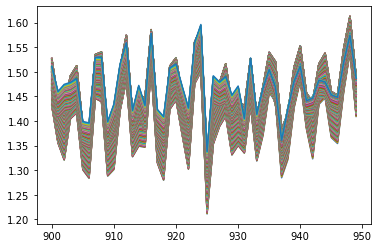

In [ ]:
plt.plot(data_plot[data_plot.Predictor==0].iloc[:,1:])
plt.show()

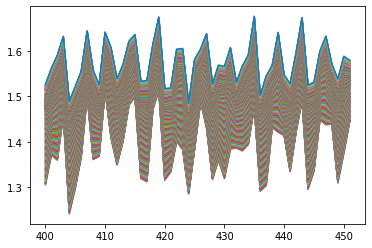

In [ ]:
plt.plot(df[df.Predictor=="Teketawi"].iloc[:,1:])
plt.show()

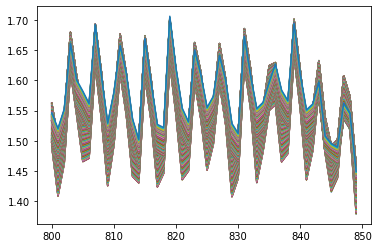

In [ ]:
plt.plot(df[df.Predictor=="Chefe"].iloc[:,1:])
plt.show()

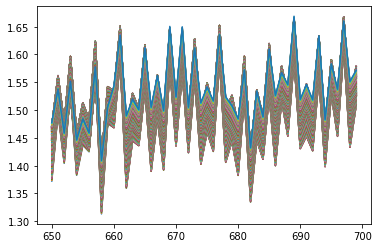

In [ ]:
plt.plot(df[df.Predictor=="Teji"].iloc[:,1:])
plt.show()

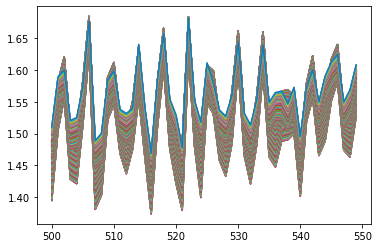

In [ ]:
plt.plot(df[df.Predictor=="Hora"].iloc[:,1:])
plt.show()

In [ ]:
def msc(input_data, reference=None):
    """
        :msc: Scatter Correction technique performed with mean of the sample data as the reference.
        :param input_data: Array of spectral data
        :type input_data: DataFrame
        :returns: data_msc (ndarray): Scatter corrected spectra data
    """
    eps = np.finfo(np.float32).eps
    input_data = np.array(input_data, dtype=np.float64)
    ref = []
    sampleCount = int(len(input_data))

    # mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
    
    # Get the reference spectrum. If not given, estimate it from the mean
    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        for j in range(0, sampleCount, 10):
            ref.append(np.mean(input_data[j:j+10], axis=0))
            # Run regression
            fit = np.polyfit(ref[i], input_data[i,:], 1, full=True)
            # Apply correction
            data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0]
    
    return (data_msc)

In [ ]:
msc_data = msc(x_data, reference=None)

In [ ]:
msc_data

array([[-0.16423614, -0.1627152 , -0.16110693, ...,  0.05979625,
         0.06269111,  0.06429234],
       [-0.16731042, -0.16609508, -0.16474282, ...,  0.06645899,
         0.06880588,  0.07010786],
       [-0.19692255, -0.19555064, -0.19384602, ...,  0.05732263,
         0.06147638,  0.06377887],
       ...,
       [-0.07298503, -0.07094473, -0.06881294, ...,  0.00629768,
         0.00535558,  0.00528406],
       [-0.04752423, -0.04622313, -0.04472422, ..., -0.0050819 ,
        -0.00596319, -0.00603008],
       [-0.0698261 , -0.0686083 , -0.06716116, ...,  0.02271728,
         0.02190377,  0.02185873]])

In [ ]:
x_data

,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,...,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,
0,1.312229,1.313752,1.315363,1.317040,1.318748,1.320468,1.322220,1.324037,1.325907,1.327774,1.329556,1.331267,1.332918,1.334555,1.336252,1.338050,1.339907,1.341765,1.343575,1.345337,1.347088,1.348894,1.350750,1.352632,1.354492,1.356296,1.358059,1.359791,1.361519,1.363247,1.364984,1.366733,1.368506,1.370309,1.372134,1.373949,1.375725,1.377462,1.379179,1.380915,...,1.523262,1.524537,1.525783,1.526817,1.527511,1.527872,1.527960,1.528001,1.528058,1.528276,1.528888,1.529733,1.530667,1.531537,1.532317,1.532994,1.533641,1.533836,1.533945,1.533919,1.533423,1.532844,1.532579,1.532602,1.532812,1.533447,1.533853,1.534672,1.535576,1.536869,1.539160,1.540128,1.539360,1.537472,1.535576,1.533732,1.534212,1.536558,1.539456,1.541060
1,1.207945,1.209409,1.211038,1.212806,1.214665,1.216582,1.218553,1.220593,1.222671,1.224727,1.226679,1.228538,1.230318,1.232068,1.233863,1.235751,1.237698,1.239661,1.241596,1.243504,1.245420,1.247399,1.249432,1.251492,1.253536,1.255533,1.257500,1.259450,1.261407,1.263377,1.265365,1.267368,1.269394,1.271442,1.273497,1.275529,1.277509,1.279439,1.281343,1.283263,...,1.474473,1.475777,1.477052,1.478118,1.478853,1.479263,1.479407,1.479506,1.479619,1.479890,1.480542,1.481423,1.482392,1.483301,1.484125,1.484852,1.485550,1.485813,1.485993,1.486043,1.485638,1.485152,1.484969,1.485064,1.485338,1.486022,1.486480,1.487336,1.488271,1.489579,1.491851,1.492835,1.492130,1.490335,1.488528,1.486766,1.487255,1.489549,1.492376,1.493944
2,1.382931,1.383910,1.385126,1.386556,1.388142,1.389842,1.391645,1.393558,1.395535,1.397497,1.399341,1.401073,1.402704,1.404285,1.405902,1.407607,1.409367,1.411129,1.412852,1.414541,1.416239,1.418015,1.419859,1.421742,1.423611,1.425427,1.427203,1.428951,1.430694,1.432434,1.434177,1.435919,1.437675,1.439446,1.441223,1.442975,1.444669,1.446309,1.447920,1.449546,...,1.549722,1.551052,1.552351,1.553431,1.554161,1.554548,1.554654,1.554710,1.554780,1.555015,1.555650,1.556524,1.557490,1.558395,1.559212,1.559928,1.560616,1.560849,1.560998,1.561013,1.560551,1.560009,1.559787,1.559858,1.560121,1.560815,1.561276,1.562154,1.563118,1.564475,1.566846,1.567866,1.567114,1.565218,1.563311,1.561454,1.561961,1.564364,1.567328,1.568971
3,1.464557,1.465710,1.466986,1.468363,1.469794,1.471253,1.472753,1.474325,1.475947,1.477559,1.479069,1.480498,1.481863,1.483220,1.484653,1.486209,1.487838,1.489472,1.491052,1.492570,1.494065,1.495604,1.497182,1.498776,1.500341,1.501848,1.503324,1.504791,1.506281,1.507800,1.509353,1.510934,1.512547,1.514190,1.515841,1.517461,1.519014,1.520501,1.521949,1.523412,...,1.632736,1.633970,1.635179,1.636164,1.636787,1.637055,1.637032,1.636958,1.636902,1.637020,1.637559,1.638348,1.639233,1.640050,1.640772,1.641385,1.641967,1.642068,1.642080,1.641950,1.641320,1.640606,1.640232,1.640171,1.640315,1.640918,1.641281,1.642090,1.642997,1.644323,1.646721,1.647711,1.646850,1.644794,1.642736,1.640737,1.641228,1.643717,1.646801,1.648502
4,1.145023,1.146660,1.148481,1.150452,1.152523,1.154657,1.156848,1.159107,1.161403,1.163678,1.165853,1.167938,1.169944,1.171920,1.173935,1.176038,1.178197,1.180371,1.182522,1.184648,1.186784,1.188983,1.191231,1.193504,1.195752,1.197943,1.200090,1.202206,1.204312,1.206418,1.208529,1.210649,1.212793,1.214965,1.217161,1.219354,1.221517,1.223647,1.225761,1.227894,...,1.433715,1.435136,1.436534,1.437734,1.438617,1.439189,1.439506,1.439782,1.440074,1.440519,1.441336,1.442372,1.443491,1.444547,1.445516,1.446382,1.447215,1.447615,1.447927,1.448104,1.447828,1.447466,1.447390,1.447577,1.447931,1.448676,1.449195,1.450093,1.451063,1.452391,1.454652,1.455651,1.454998,1.453276,1.451538,1.449841,1.450336,1.452587,1.455357,1.456896
...,...,.

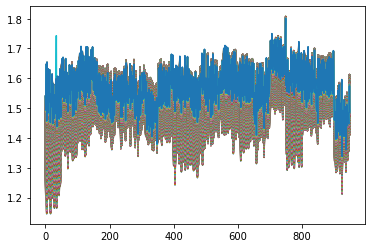

In [ ]:
plt.plot(x_data)
plt.show()

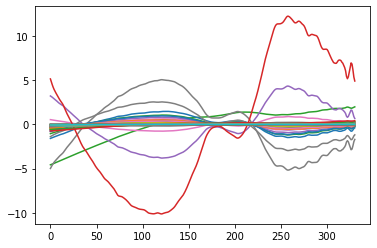

In [ ]:
for i in range(500):
  plt.plot(msc_data[i])

plt.show()

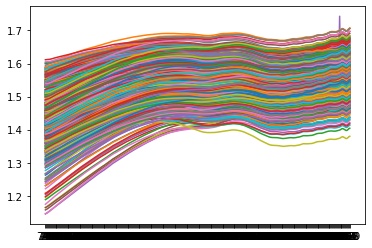

In [ ]:
for i in range(500):
  plt.plot(x_data.iloc[i])

plt.show()

In [ ]:
msc_data_all = pd.DataFrame(msc_data,columns=x_data.columns)
msc_plot = pd.concat([y_data,msc_data_all],axis=1)

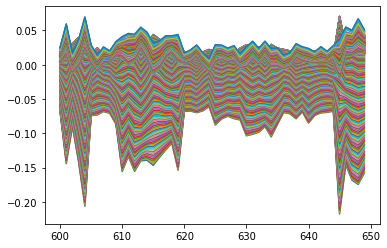

In [ ]:
plt.plot(msc_plot[msc_plot.Predictor==1].iloc[:,1:])
plt.show()

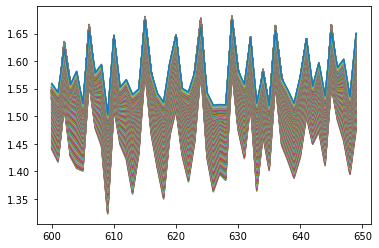

In [ ]:
plt.plot(data_plot[data_plot.Predictor==1].iloc[:,1:])
plt.show()

In [ ]:
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
    return output_data

In [ ]:
np.mean(x_data[1,:]

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(msc_data_all, y_data ,
                                                    test_size=0.2,
                                                    random_state=77 ,stratify=y_data)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=00,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=77, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
  # ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
lr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=0,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=77, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predt = lr.predict(x_train)
print("훈련 정확도: {:.3f}".format(accuracy_score(y_predt, y_train)))
y_pred = lr.predict(x_test)
print("예측 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))

훈련 정확도: 0.053
예측 정확도: 0.053


In [ ]:
from sklearn.svm import SVC
clf =SVC(C=10000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=77, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(x_train, y_train)
y_predt = clf.predict(x_train)
print("훈련 정확도: {:.3f}".format(accuracy_score(y_predt, y_train)))
y_pred = clf.predict(x_test)
print("예측 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 정확도: 0.275
예측 정확도: 0.195


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=77, verbose=0,
                       warm_start=False)
rf.fit(x_train, y_train)

y_predt = rf.predict(x_train)
print("훈련 정확도: {:.3f}".format(accuracy_score(y_predt, y_train)))
y_pred = rf.predict(x_test)
print("예측 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


훈련 정확도: 1.000
예측 정확도: 0.332


In [ ]:
#Savitzky-Golay filter with derivative.
from scipy.signal import savgol_filter 

sg=savgol_filter(x_data,window_length=11, polyorder=3, deriv=2, delta=1.0)

sg_x=pd.DataFrame(sg, columns=x_data.columns)

sg_x.head()

,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,...,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,
0,0.000069,0.000062,0.000055,0.000048,0.000041,0.000035,0.000022,0.000006,-0.000009,-0.000020,-0.000023,-0.000016,-8.149394e-07,0.000014,0.000022,0.000021,0.000014,0.000007,0.000003,0.000003,0.000005,0.000006,0.000002,-0.000006,-0.000015,-0.000020,-0.000020,-0.000014,-0.000004,0.000005,0.000011,0.000013,0.000009,0.000002,-4.281413e-06,-0.000009,-0.000011,-0.000012,-0.000013,-0.000017,...,0.000067,-0.000017,-0.000103,-0.000165,-0.000181,-0.000144,-0.000067,0.000020,0.000090,0.000125,0.000121,0.000087,0.000026,-0.000043,-0.000101,-0.000149,-0.000181,-0.000184,-0.000154,-0.000096,-0.000012,0.000065,0.000128,0.000174,0.000203,0.000235,0.000218,0.000117,-0.000063,-0.000261,-0.000424,-0.000452,-0.000289,8.533263e-07,0.000294,0.000729,0.001164,0.001599,0.002034,0.002469
1,0.000172,0.000149,0.000127,0.000104,0.000081,0.000059,0.000032,0.000005,-0.000019,-0.000036,-0.000040,-0.000032,-1.481418e-05,0.000004,0.000018,0.000023,0.000022,0.000019,0.000016,0.000016,0.000016,0.000015,0.000010,0.000001,-0.000007,-0.000011,-0.000009,-0.000003,0.000005,0.000011,0.000014,0.000011,0.000004,-0.000006,-1.419113e-05,-0.000019,-0.000019,-0.000015,-0.000012,-0.000010,...,0.000063,-0.000019,-0.000102,-0.000162,-0.000177,-0.000140,-0.000066,0.000019,0.000088,0.000122,0.000118,0.000086,0.000027,-0.000040,-0.000096,-0.000143,-0.000174,-0.000177,-0.000149,-0.000093,-0.000012,0.000062,0.000122,0.000167,0.000195,0.000225,0.000208,0.000109,-0.000065,-0.000257,-0.000416,-0.000442,-0.000284,-3.527249e-06,0.000280,0.000703,0.001125,0.001547,0.001969,0.002391
2,0.000269,0.000236,0.000203,0.000170,0.000137,0.000104,0.000066,0.000027,-0.000009,-0.000036,-0.000048,-0.000045,-2.823560e-05,-0.000008,0.000007,0.000014,0.000015,0.000014,0.000014,0.000017,0.000021,0.000020,0.000014,0.000003,-0.000009,-0.000017,-0.000019,-0.000015,-0.000008,-0.000001,0.000002,0.000001,-0.000004,-0.000012,-1.872670e-05,-0.000022,-0.000022,-0.000020,-0.000018,-0.000019,...,0.000067,-0.000020,-0.000108,-0.000171,-0.000187,-0.000149,-0.000071,0.000019,0.000091,0.000127,0.000124,0.000091,0.000029,-0.000041,-0.000100,-0.000148,-0.000181,-0.000184,-0.000154,-0.000095,-0.000011,0.000067,0.000131,0.000178,0.000206,0.000238,0.000221,0.000117,-0.000067,-0.000269,-0.000435,-0.000463,-0.000297,-2.368324e-06,0.000296,0.000739,0.001182,0.001625,0.002069,0.002512
3,0.000112,0.000099,0.000085,0.000072,0.000059,0.000045,0.000026,0.000006,-0.000013,-0.000025,-0.000026,-0.000015,3.402928e-06,0.000021,0.000031,0.000028,0.000018,0.000006,-0.000003,-0.000006,-0.000005,-0.000003,-0.000004,-0.000008,-0.000011,-0.000011,-0.000005,0.000005,0.000016,0.000023,0.000025,0.000019,0.000007,-0.000007,-1.880671e-05,-0.000026,-0.000027,-0.000023,-0.000019,-0.000017,...,0.000079,-0.000013,-0.000107,-0.000174,-0.000192,-0.000152,-0.000071,0.000022,0.000097,0.000134,0.000130,0.000094,0.000029,-0.000045,-0.000107,-0.000157,-0.000192,-0.000194,-0.000162,-0.000100,-0.000009,0.000073,0.000141,0.000191,0.000222,0.000256,0.000238,0.000130,-0.000063,-0.000274,-0.000449,-0.000478,-0.000304,5.485790e-06,0.000318,0.000783,0.001248,0.001713,0.002178,0.002643
4,0.000186,0.000161,0.000137,0.000112,0.000088,0.000063,0.000035,0.000007,-0.000018,-0.000035,-0.000040,-0.000032,-1.593790e-05,0.000003,0.000016,0.000022,0.000021,0.000019,0.000016,0.000016,0.000015,0.000012,0.000004,-0.000006,-0.000017,-0.000023,-0.000022,-0.000016,-0.000006,0.000003,0.000010,0.000012,0.000010,0.000005,-5.375221e-07,-0.000004,-0.000006,-0.000007,-0.000008,-0.000011,...,0.000065,-0.000014,-0.000095,-0.000153,-0.000168,-0.000133,-0.000061,0.000020,0.000086,0.000118,0.000113,0.000081,0.000022,-0.000044,-0.000100,-0

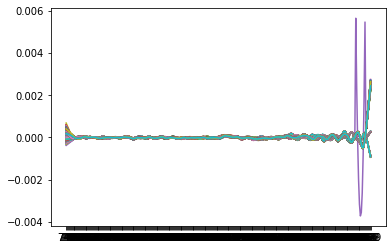

In [ ]:
for i in range(800):
  plt.plot(sg_x.iloc[i])

plt.show()

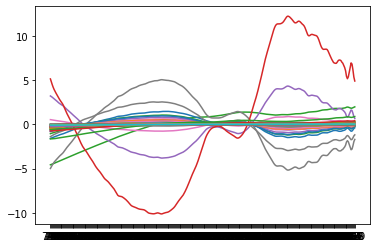

In [ ]:
for i in range(800):
  plt.plot(msc_data_all.iloc[i])

plt.show()